*Cargar y explorar un dataset*
---
---


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [ ]:
# Vemos las primeras filas
df.head()

In [ ]:
df.info()
df.describe()

In [ ]:
# Seleccionar las columnas Name, Sex y Age.
df[['Name', 'Sex', 'Age']].head(10)

In [ ]:
#Filtrado por condición
#Filtrar a los pasajeros que tienen menos de 18 años (niños). ordenar de manera ascendente por edad
df[df['Age']<18].head(10).sort_values('Age', ascending=True)

In [ ]:
# Cantidad de pasajeros por clase (Pclass)
df['Pclass'].value_counts()

In [ ]:
# Calcula la edad promedio de los pasajeros según su género.
df.groupby('Sex')['Age'].mean().round(0)

In [ ]:
# Mostrar los 5 nombres de mujeres sobrevivientes de primera clase más jóvenes, ordenadas de menor a mayor edad
df[(df['Pclass'] == 1) & (df['Sex'] == 'female') & (df['Survived'] == 1)][['Name', 'Age']].sort_values('Age').head(5)

In [ ]:
# Calcular la tasa de supervivencia (porcentaje de sobrevivientes) para cada combinación de clase (Pclass) y sexo (Sex).

df_aux = df
df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index(name='Survival Rate').sort_values('Survival Rate', ascending=False)

In [ ]:
# Verificar si hay valores nulos en el DataFrame
df.isnull().sum().sort_values(ascending=False)

In [ ]:
df_aux = df.copy()

In [ ]:
# Crear la columna 'AgeGroup' con las categorías 'child', 'adult' y 'senior' según la edad.
# Rellenar los valores nulos de 'Age' con la media de la columna 'Age'

df_aux['Age'].fillna(df_aux['Age'].mean())
df_aux['Age'] = df_aux['Age'].round().astype(int)
df_aux['AgeGroup'] = pd.cut(df_aux['Age'], bins=[-1, 17, 60, float('inf')], labels=['child', 'adult', 'senior'])

df_aux.head(30)

In [ ]:
# Crear la tabla resumen con pivot_table
df_pivot = df_aux.pivot_table(
    index=['Pclass', 'AgeGroup'],  # Lo que queremos ver como "categorías de fila"
    columns='Sex',                # Lo que queremos como columnas
    values='Name',                # Usamos 'Name' como algo a contar (cualquier columna no nula sirve)
    aggfunc='count',              # Queremos contar cuántos hay
    fill_value=0                  # Por si hay combinaciones vacías
)


df_pivot

C:\Users\User\AppData\Local\Temp\ipykernel_34420\979726297.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df_aux.pivot_table(


Sex              female  male
Pclass AgeGroup              
1      child          8     4
       adult         84   106
       senior         2    12
2      child         12    11
       adult         64    94
       senior         0     3
3      child         35    43
       adult        108   300
       senior         1     4

In [57]:
# Supervivencia por grupo
pivot_survival = df_aux.pivot_table(
    index=['AgeGroup', 'Pclass'],
    columns='Sex',
    values='Survived',
    aggfunc='mean',
    fill_value=0,
    observed=True
)

pivot_survival

Sex                female      male
AgeGroup Pclass                    
child    1       0.875000  1.000000
         2       1.000000  0.818182
         3       0.542857  0.232558
adult    1       0.976190  0.377358
         2       0.906250  0.074468
         3       0.481481  0.123333
senior   1       1.000000  0.083333
         2       0.000000  0.333333
         3       1.000000  0.000000

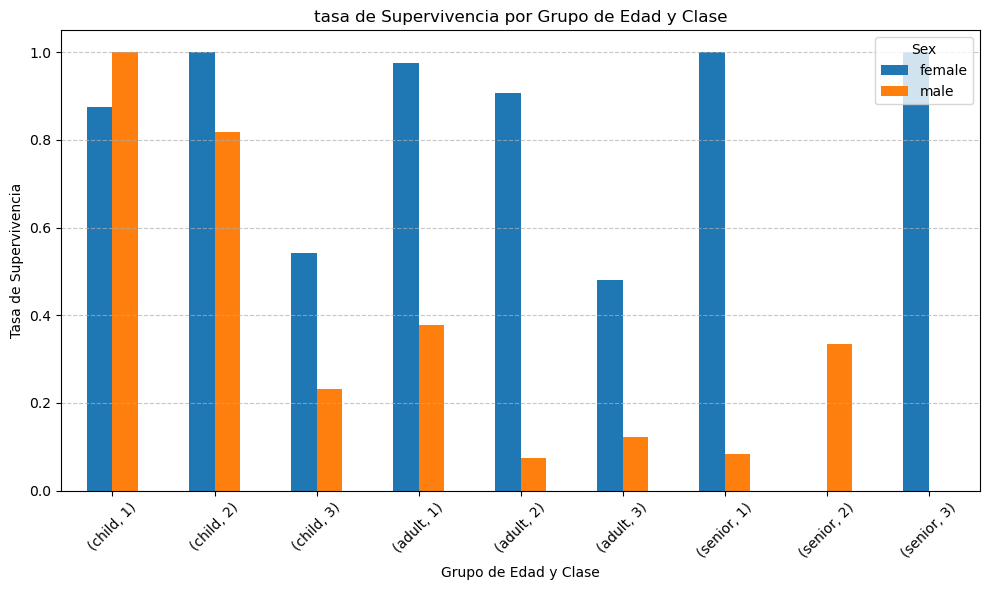

In [65]:
import matplotlib.pyplot as plt

# Crear la figura
pivot_survival.plot(kind='bar', figsize=(10,6))

# Agregar etiquetas y título
plt.title('tasa de Supervivencia por Grupo de Edad y Clase')
plt.ylabel('Tasa de Supervivencia')
plt.xlabel('Grupo de Edad y Clase')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha= 0.7)

plt.tight_layout()
plt.show()

In [66]:
df_pivot = df_pivot.reset_index() # devuelve 'Pclass' y 'AgeGroup' como columnas
pivot_long = df_pivot.melt(
    id_vars=['Pclass', 'AgeGroup'],
    value_vars=['female', 'male'],
    var_name='Sex',
    value_name='PassengerCount'
)


C:\Users\User\AppData\Local\Temp\ipykernel_34420\1211750993.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


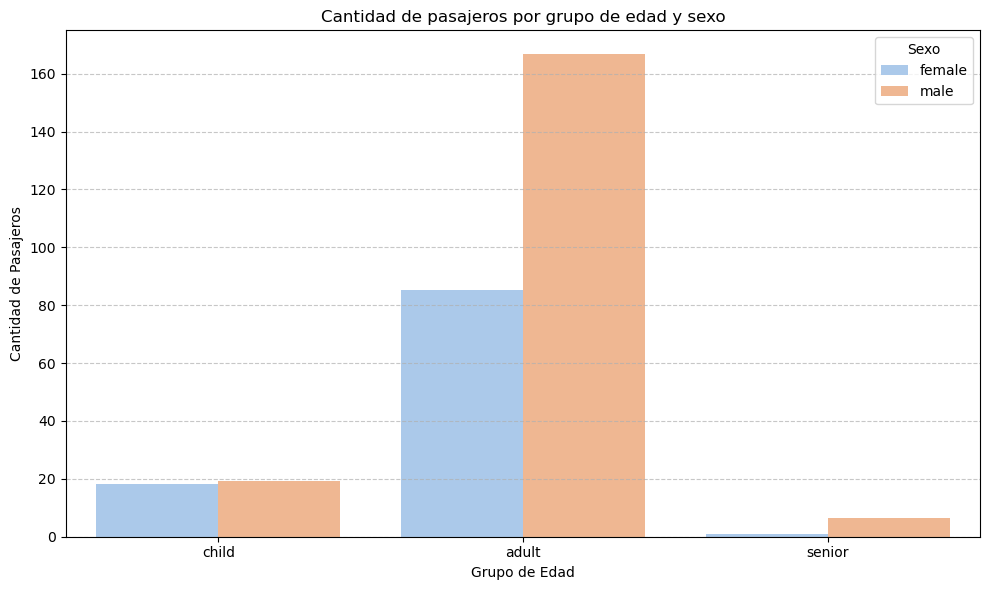

In [61]:
import seaborn as sns


plt.figure(figsize=(10,6))
sns.barplot(
    data=pivot_long,
    x='AgeGroup',
    y='PassengerCount',
    hue='Sex',
    ci=None,
    palette='pastel'
)

plt.title('Cantidad de pasajeros por grupo de edad y sexo')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Sexo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


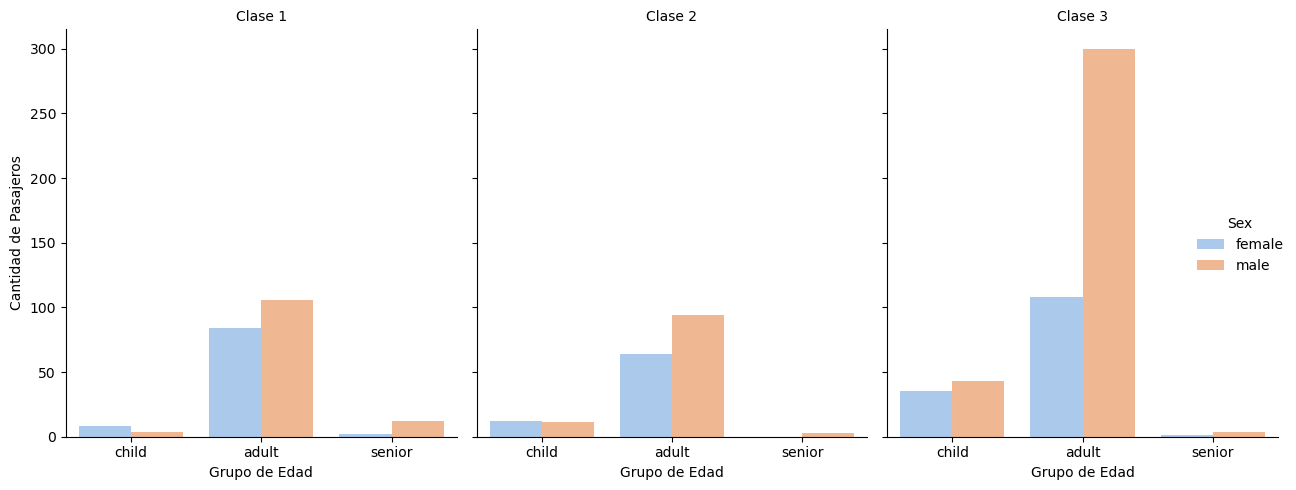

In [64]:
g = sns.catplot(
    data=pivot_long,
    x='AgeGroup',
    y='PassengerCount',
    hue='Sex',
    col='Pclass',
    kind='bar',
    errorbar=None,
    palette='pastel',
    height=5,
    aspect=0.8
)

g.set_titles("Clase {col_name}")
g.set_axis_labels("Grupo de Edad", "Cantidad de Pasajeros")

plt.tight_layout()
plt.show()
